In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [4]:
# subset_col=['year','diqu','jigou_1','jigou_2', 'jigou_3', 'guanzhi','chushen_1','pinji_numeric', 'xitong']
df=pd.read_csv('../data/Jinshenlu.txt',sep='\t',
#                usecols=subset_col, 
              error_bad_lines=False)
# df.sample(frac=0.01).to_csv('../data/Jinshenlu_sample.csv', encoding='utf-8')

e:\hkust\learning\fyp\venv_fyt\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,25,27,29,30,31,32,33,35,36,37,43,44,45,46,47,48,49,50,51,54,55,56,57,58,60,63,66,68,71,73,74,84,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Curate the database: filter out the malformed for the moment.
1. Calculate the portion of malformed and some basic stats
2. remove malformed and irrelevant(fangkeben_only=0 qiren=0 exclude people without names)

In [1]:
df.describe()

NameError: name 'df' is not defined

Count how much are machu civilians

In [5]:
# df['qiren'].isnull().sum()
# (df['qiren']=='1').sum()
# df[df['qiren'].isnull()]
(df['qiren']=='旗人').sum()/df.shape[0]

0.21570111636069703

In [6]:
(df['fangkeben_only']==1).sum()/df.shape[0]

0.04625493778798516

In [7]:
print('no surname',df['xing'].isnull().sum())
print('no last name', df['ming'].isnull().sum())
print('no zihao', df['zihao'].isnull().sum())
print('no name at all', (df['xing'].isnull() & df['ming'].isnull() & df[ 'zihao'].isnull()).sum())


no surname 782335
no last name 194191
no zihao 2727832
no name at all 193626


Now remove all the irrelevant/malformed

In [5]:
irr_idx=df[(df['qiren']=='旗人')|(df['fangkeben_only']==1) |
           (df['xing'].isnull() & df['ming'].isnull() & df[ 'zihao'].isnull())].index.tolist()
malformed_idx=df[(df['year'].isin(['銀庫', '蒙古',7.0])) | 
                 (df['pinji_numeric']=='州') | df['year'].isnull() |
                df['qiren'].isnull()].index.tolist()
to_remove=set(irr_idx)|set(malformed_idx)

In [11]:
print(len(to_remove))

918912


In [6]:
df.drop(to_remove, inplace=True)
df['year']=df['year'].astype(float)
df['pinji_numeric']=df['pinji_numeric'].astype(float)

Weird: 1880-1882 no records?

Text(0,0.5,'#Records')

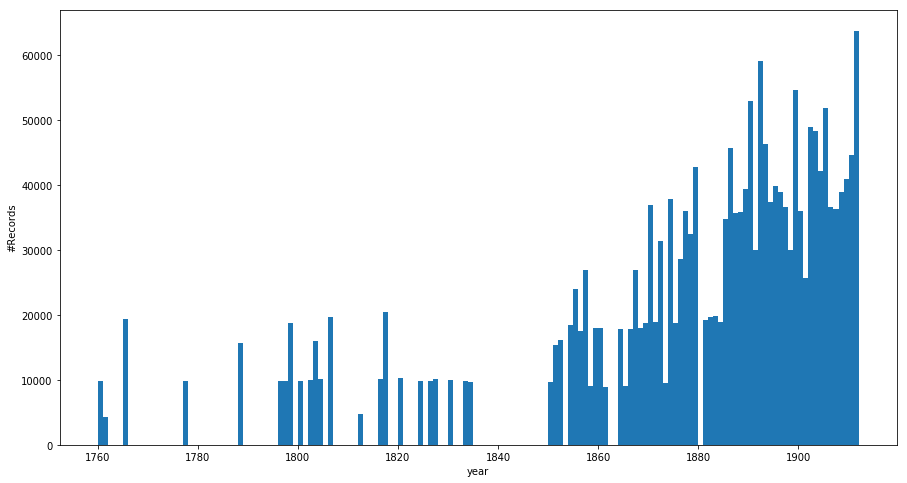

In [19]:
plt.figure(figsize=(15,8))
counts_ends=plt.hist(df['year'].dropna(), bins=np.arange(1760,1913))
plt.xlabel('year')
plt.ylabel('#Records')

Is that the real distribution of Qing civil servant's rankings?

Text(0,0.5,'#records')

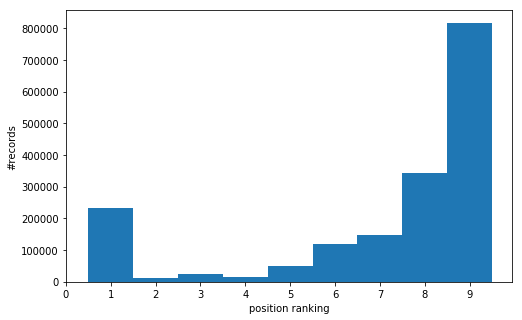

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df['pinji_numeric'].dropna().astype(float), bins=9, align='right')
plt.xticks(np.arange(10))
plt.xlabel('position ranking')
plt.ylabel('#records')

In [21]:
# plt.hist(df['jicheng_hao'].dropna())
# plt.hist(df['jicheng_hao'].astype(float))
df['jicheng_hao'].unique()

array([1.0, 2.0, 3.0, nan, 4.0, 5.0, 6, 7, '3', '4', '2', '5', '6', '7'],
      dtype=object)

In [ ]:
tmp_df1=df[['xing', 'ming', 'zihao', ]]

In [22]:
print(len(df['unique_id'].unique()))
print(df.shape)

256819
(2058889, 97)


In [23]:
df['unique_id'].isnull().sum()

298

(array([0.0000e+00, 7.9147e+04, 3.6388e+04, 2.1620e+04, 1.6289e+04,
        1.2357e+04, 9.9780e+03, 7.4920e+03, 6.3330e+03, 5.5240e+03,
        5.5460e+03, 4.2760e+03, 3.6000e+03, 3.6490e+03, 3.1900e+03,
        3.4470e+03, 3.1860e+03, 2.3770e+03, 2.0630e+03, 2.0100e+03,
        1.7330e+03, 1.4670e+03, 1.4260e+03, 1.2830e+03, 1.1750e+03,
        1.1160e+03, 1.2600e+03, 1.1210e+03, 1.0430e+03, 8.8400e+02,
        9.7200e+02, 8.2500e+02, 8.5100e+02, 6.5500e+02, 6.4000e+02,
        6.4700e+02, 6.0400e+02, 5.9900e+02, 5.1200e+02, 5.6200e+02,
        4.5300e+02, 4.1100e+02, 4.3500e+02, 3.9200e+02, 3.5900e+02,
        3.7600e+02, 3.4200e+02, 3.2100e+02, 3.5300e+02, 2.7500e+02,
        2.5200e+02, 2.5400e+02, 2.6100e+02, 2.2900e+02, 2.4100e+02,
        2.4600e+02, 1.9100e+02, 2.2000e+02, 1.8300e+02, 1.8100e+02,
        1.5300e+02, 1.6500e+02, 1.7500e+02, 1.4500e+02, 1.4900e+02,
        1.2900e+02, 1.2800e+02, 1.4200e+02, 1.0300e+02, 9.6000e+01,
        7.9000e+01, 9.5000e+01, 1.0200e+02, 6.90

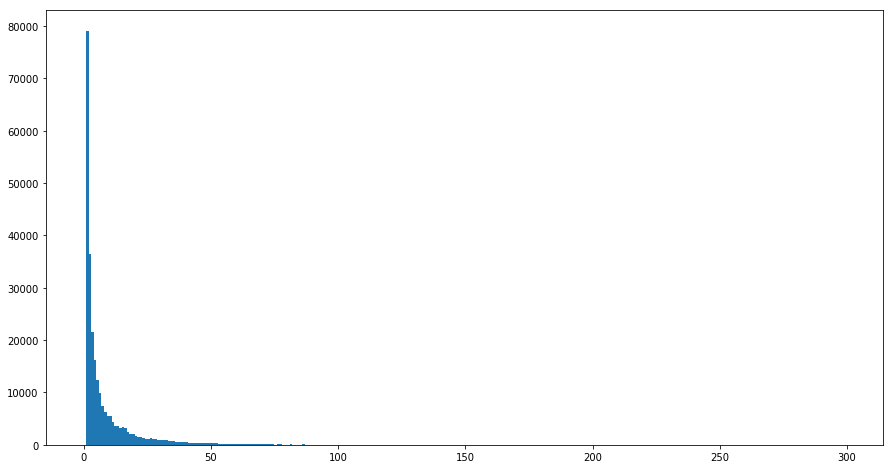

In [25]:
plt.figure(figsize=(15,8))
plt.hist(df['unique_id'].value_counts(), bins=np.arange(0,300))

(array([0.0000e+00, 7.8318e+04, 3.6107e+04, 2.1525e+04, 1.6194e+04,
        1.2359e+04, 1.0010e+04, 7.4940e+03, 6.3780e+03, 5.5400e+03,
        5.5260e+03, 4.2830e+03, 3.6080e+03, 3.6640e+03, 3.2170e+03,
        3.4710e+03, 3.1810e+03, 2.3890e+03, 2.0930e+03, 2.0220e+03,
        1.7620e+03, 1.5060e+03, 1.4310e+03, 1.2850e+03, 1.1910e+03,
        1.1540e+03, 1.3060e+03, 1.1410e+03, 1.0640e+03, 9.0800e+02,
        9.7800e+02, 8.6400e+02, 8.8200e+02, 6.9500e+02, 6.7600e+02,
        6.7800e+02, 6.3500e+02, 6.2700e+02, 5.2300e+02, 5.9100e+02,
        4.8000e+02, 4.2800e+02, 4.6600e+02, 3.9600e+02, 3.6600e+02,
        3.9400e+02, 3.6000e+02, 3.4700e+02, 3.5600e+02, 2.8500e+02,
        2.8300e+02, 2.7300e+02, 2.6800e+02, 2.4400e+02, 2.4800e+02,
        2.7100e+02, 2.0700e+02, 2.2900e+02, 2.0700e+02, 2.0200e+02,
        1.7400e+02, 1.6500e+02, 1.9700e+02, 1.4900e+02, 1.6000e+02,
        1.2700e+02, 1.3000e+02, 1.5300e+02, 1.0800e+02, 9.6000e+01,
        8.7000e+01, 9.6000e+01, 1.0400e+02, 7.50

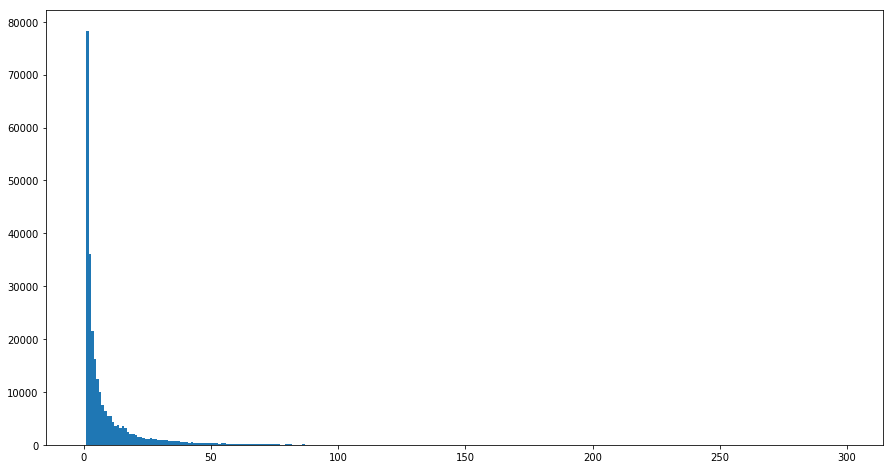

In [29]:
plt.figure(figsize=(15,8))
plt.hist(df[['unique_id', 'linked_record_count']].drop_duplicates()['linked_record_count'].dropna(), bins=np.arange(0,300))
# plt.hist(df['linked_record_count'].dropna(), )

Examine rankings in detail

In [38]:
df['pinji_detailed'].unique()

array([nan, '正八品', '正七品', '從九品', '正六品', '從五品', '正五品', '從七品', '未入流', '從六品',
       '正二品', '從四品', '正九品', '從三品', '從一品', '正四品', '正三品', '八品', '正一品',
       '從二品', '從八品', '從一品(應為正四品)', '三品', '九品', '四品', '不入流', '六品', '一品',
       '二品', '七品', '五品'], dtype=object)

In [33]:
df[df['pinji_detailed'].isnull()].shape

(320167, 97)

In [7]:
def str2float(s):
    if s in [np.nan, '不入流', '未入流']:
        return 10.0
    if s=='從一品(應為正四品)':
        return 4.0
    dic=dict(zip(['一', '二','三','四','五', '六','七','八','九'], np.arange(1,10)))
    base = dic[s[-2]]
    base+=0.5*('從' in s)
    return float(base)
for i in df['pinji_detailed'].unique():
    print(i, 'converted into', str2float(i))

nan converted into 10.0
正八品 converted into 8.0
正七品 converted into 7.0
從九品 converted into 9.5
正六品 converted into 6.0
從五品 converted into 5.5
正五品 converted into 5.0
從七品 converted into 7.5
未入流 converted into 10.0
從六品 converted into 6.5
正二品 converted into 2.0
從四品 converted into 4.5
正九品 converted into 9.0
從三品 converted into 3.5
從一品 converted into 1.5
正四品 converted into 4.0
正三品 converted into 3.0
八品 converted into 8.0
正一品 converted into 1.0
從二品 converted into 2.5
從八品 converted into 8.5
從一品(應為正四品) converted into 4.0
三品 converted into 3.0
九品 converted into 9.0
四品 converted into 4.0
不入流 converted into 10.0
六品 converted into 6.0
一品 converted into 1.0
二品 converted into 2.0
七品 converted into 7.0
五品 converted into 5.0


In [8]:
df['pinjin_detailed_numeric']=df['pinji_detailed'].apply(str2float)

In [ ]:
min_arr=[]
for id, subtable in tqdm(df[['unique_id','pinjin_detailed_numeric']].groupby('unique_id')):
    if subtable['pinjin_detailed_numeric'].isnull().all():
        continue
    key=subtable['pinjin_detailed_numeric'].max()
    arr=subtable['pinjin_detailed_numeric'].dropna().values
    min_arr.append((key, arr))
sorted_min_arr=sorted(min_arr, key=lambda x:x[0])

In [ ]:
points=[]
colors=[]
for i, (start,rankings) in tqdm(enumerate(sorted_min_arr)):
    for ranking in rankings:
        points.append([ranking, i])
        colors.append(start)
#     for itp in np.arange(rankings.min(), rankings.max(), 0.2):
#         points.append([itp, i])
points=np.array(points)

In [ ]:
plt.style.use('white-grid')
plt.figure(figsize=(15,15))
plt.scatter(points[:,0],points[:,1],s=0.01, c=colors, cmap='rainbow')
plt.colorbar(label='Ranking')
plt.xlabel('Ranking')
plt.xticks(np.arange(1, 10.1,0.5))

In [18]:
count=0
for id, subtable in tqdm(df[['unique_id','pinjin_detailed_numeric']].groupby('unique_id')):
    if subtable['pinjin_detailed_numeric'].notnull().any():
        count+=1



256818
(2058889, 98)
0.12473620481725824


In [1]:
print(count)
print(df['unique_id'].unique().shape[0])
print(count/df['unique_id'].unique().shape[0])

NameError: name 'count' is not defined